### MultiClass Classification Project

Linear Goals
- How to read different size images from a directory?
- How to implement One-vs-one scheme for Multiclass classification?
- How to use SVM for image classification?

### Dataset Prepration 

In [7]:
import numpy as np
import os
from pathlib import Path 
from keras.preprocessing import image

In [8]:
p = Path("./Images/")

img_data = []
labels = []
    
dirs = p.glob("*")  #to specify the name of file/folder you want to excess * represents all files and folder

labels_dict = {"cat":0,"dog":1,"horse":2,"human":3}

for folder_dir in dirs:
    label =  str(folder_dir).split("\\")[-1][:-1]
    
    for img_path in folder_dir.glob("*.jpg"):
        
        img = image.load_img(img_path,target_size=(32,32))
        img_array = image.img_to_array(img)
        img_data.append(img_array)
        labels.append(labels_dict[label])

In [9]:
print(len(img_data))
print(len(labels))

808
808


In [10]:
print(labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [11]:
#Convert data in numpy array
img_data = np.array(img_data,dtype='float32')/255.0
labels = np.array(labels)
print(img_data.shape,labels.shape)

(808, 32, 32, 3) (808,)


### Randomly Shuffle our Data!

In [12]:
import random 

combined = list(zip(img_data,labels))
random.shuffle(combined)

img_data[:],labels[:] = zip(*combined)

### Visualise the data! 

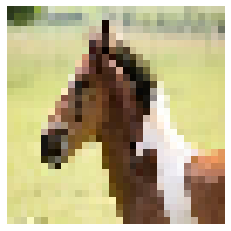

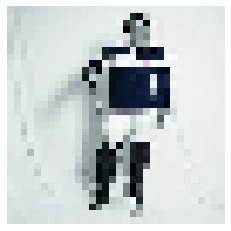

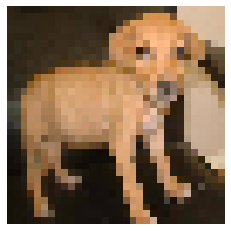

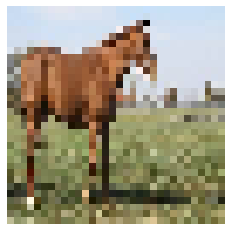

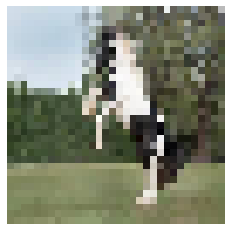

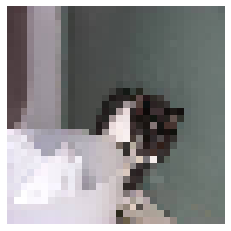

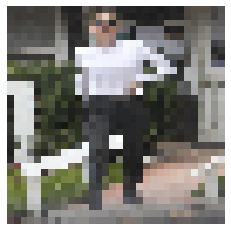

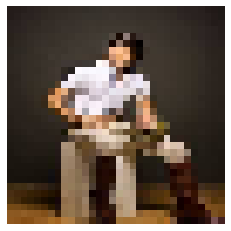

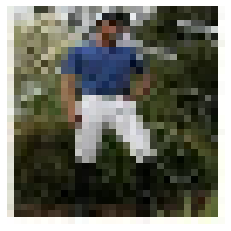

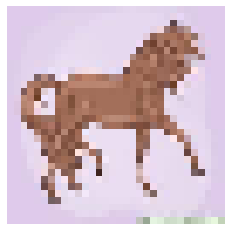

In [13]:
def drawing(img):
    import matplotlib.pyplot as plt
    plt.imshow(img)
    plt.axis("off")
    plt.show()
    return

for i in range(10):
    drawing(img_data[i])

### SVM Classifier 

In [8]:
class SVM:
    
    def __init__(self,C=1.0):
        self.C = C
        self.W = 0
        self.b = 0
        
    def hingeLoss(self,W,b,X,Y):
        loss = 0.0
        
        loss+= 0.5*np.dot(W.T,W)
        
        for i in range(X.shape[0]):
            ti = Y[i]*(np.dot(W,X[i].T)+b)
            loss+=self.C*max(0,1-ti)
        
        return loss[0][0]
    
    def fit(self,X,Y,lr_rate=0.001,batch_size=50,maxItr=100):
        no_of_features = X.shape[1]
        no_of_samples = X.shape[0]
        
        c = self.C
        n=lr_rate
        
        bias = 0
        W = np.zeros((1,no_of_features))
        
        print(self.hingeLoss(W,bias,X,Y))
        
        losses=[]
        
        for i in range(maxItr):
            
            l = self.hingeLoss(W,bias,X,Y)
            losses.append(l)
            ids = np.arange(no_of_samples)
            np.random.shuffle(ids)
            
            for batch_start in range(0,no_of_samples,batch_size):
                
                gradw=0
                gradb=0
                
                for j in range(batch_start,batch_start+batch_size):
                    if j<no_of_samples:
                        i = ids[j]
                        ti = Y[i]*(np.dot(W,X[i].T)+bias)
                        if(ti>1):
                            gradw+=0
                            gradb+=0
                        else:
                            gradw+=c*Y[i]*X[i]
                            gradb+=c*Y[i]
                            
                W = W - n*W + n*gradw
                bias = bias +n*gradb
            
        self.W = W
        self.b = bias
        return W,bias,losses
            

### Convert data for One vs One  

In [9]:
M = img_data.shape[0]
img_data = img_data.reshape((M,-1))
print(img_data.shape)
print(labels.shape)

(808, 3072)
(808,)


In [10]:
CLASSES = len(np.unique(labels))
print(CLASSES)

4


In [11]:
def classWiseData(x,y):
    data={}
    
    for i in range(CLASSES):
        data[i] = []
        
    for i in range(x.shape[0]):
        data[y[i]].append(x[i])
        
    for k in data.keys():
        data[k] = np.array(data[k])
    
    return data

In [12]:
data = classWiseData(img_data,labels)

In [13]:
def getDataPairForSVM(d1,d2):
    """Combine Data fo two classes into a simple matrix"""
    
    l1,l2 = d1.shape[0],d2.shape[0]
    
    samples = l1+l2
    features = d1.shape[1]
    
    data_pair = np.zeros((samples,features))
    data_labels = np.zeros((samples,))
    
    data_pair[:l1,:] = d1
    data_pair[l1:,:] = d2
    
    data_labels[:l1] = -1
    data_labels[l1:] = 1
    
    return data_pair,data_labels

### Training NC2 SVM's  

In [30]:
mySVM = SVM()
xp,yp = getDataPairForSVM(data[0],data[1])
w,lr,loss = mySVM.fit(xp,yp,lr_rate=0.00001,maxItr=1000)
print(loss)
plt.plot(loss)
plt.show()

404.0


KeyboardInterrupt: 

In [15]:
def trainSVM(x,y):
    
    svm_classifiers = {}
    
    for i in range(CLASSES):
        svm_classifiers[i] = {}
        for j in range(i+1,CLASSES):
            xpair,ypair = getDataPairForSVM(data[i],data[j])
            wts,b,loss = mySVM.fit(xpair,ypair)
            svm_classifiers[i][j] = (wts,b)
    
    return svm_classifiers

In [16]:
svm_classifiers = trainSVM(img_data,labels)

404.0
404.0
404.0
404.0
404.0
404.0


In [18]:
cats_dogs = svm_classifiers[0][1]
cats_humans = svm_classifiers[0][2]
print(cats_dogs[0].shape)
print(cats_dogs[1])

(1, 3072)
-4.619999999999998


### Predcition 

In [19]:
def binaryPredict(x,w,b):
    z = np.dot(x,w.T)+b
    if z >=0:
        return 1
    else:
        return -1

In [22]:
def predict(x):
    count = np.zeros((CLASSES,))
    for i in range(CLASSES):
        for j in range(i+1,CLASSES):
            w,b = svm_classifiers[i][j]
            # Take a majourity prediction
            z = binaryPredict(x,w,b)
            
            if(z==1):
                count[j]+=1
            else:
                count[i]+=1
                
    final_prediction = np.argmax(count)
    #print(count)
    return final_prediction

In [23]:
prediction = predict(img_data[0])
print(prediction)
print(labels[0])

1
3


In [24]:
def accuracy(x,y):
    
    count = 0
    for i in range(x.shape[0]):
        prediction = predict(x[i])
        if(prediction==y[i]):
            count+=1
        
    return count/x.shape[0]

In [25]:
accuracy(img_data,labels)

0.26732673267326734

In [31]:
from sklearn import svm
svm_classifier = svm.SVC(kernel='linear',C=1.0)

In [32]:
svm_classifier.fit(img_data,labels)
svm_classifier.score(img_data,labels)

0.6472772277227723